# Parametric Test / Non Parametric Test and Kernel Regressions

### 1. Understanding Parametric and Non Parametric Test

Parametric methods assume that the population has a specific distribution or functional form, and estimate the parameters of that distribution from the sample data

If your data is normally distributed. Parametric tests is used - example 
1. t-test
2. ANOVA
3. Pearson Correlation

Parametric methods have several advantages, including:

Simplicity: Parametric models are often simpler and more interpretable than non-parametric models, making them easier to understand and communicate.

Efficiency: Parametric models can be more efficient than non-parametric models when the underlying relationship between the variables is well-defined and the assumptions are valid.

Fewer data requirements: Parametric models typically require less data to estimate the parameters and make accurate predictions compared to non-parametric models.

##### However, parametric methods can be limiting in situations where the true relationship between the variables is more complex or unknown. Non-parametric methods like kernel regression can be useful in these situations, as they do not rely on any specific functional form or distribution assumption for the relationship between the variables.




1. t-test: The t-test is used to compare the means of two samples. In the code example, the t-test is used to compare the mean daily returns of AAPL and JPM. The test provides a t-statistic and a p-value. The t-statistic measures the difference between the means of the two samples, and the p-value measures the probability of obtaining a difference as large as the one observed in the sample, assuming that the means of the two populations are equal. A small p-value (typically less than 0.05) indicates that the difference between the means of the two samples is unlikely to be due to chance, and suggests that there may be a significant difference in the mean daily returns of the two stocks.

t-test is a useful tool for analyzing differences between two samples, such as the daily returns of two stocks. In an investment portfolio context, t-tests can be used to compare the performance of two stocks or two portfolios, to determine whether there is a significant difference between their returns. the null hypothesis would assume that there is no significant difference between the mean daily returns of the two stocks. 

p-value is a probability value that measures the strength of evidence against the null hypothesis

2. ANOVA can be used to test whether there is a significant difference in the mean returns of stocks in different industry sectors, such as technology, healthcare, and energy. The null hypothesis for ANOVA in this case would be that there is no significant difference in the mean returns between the different industry sectors.

By testing for significant differences in mean returns between groups of assets or portfolios, ANOVA can help identify potential investment opportunities or diversification strategies. For instance, if ANOVA results suggest that there is a significant difference in mean returns between industry sectors, an investor might consider investing in a portfolio that includes a mix of stocks from multiple sectors in order to diversify their holdings and potentially increase overall returns.



3. Pearson correlation coefficient is a statistical method used to test for the linear relationship between the returns of two different assets or portfolios. A high correlation coefficient between the returns of two assets indicates that the returns tend to move together in the same direction, while a low or negative correlation coefficient indicates that the returns tend to move in opposite directions.

A high correlation coefficient between the returns of two assets indicates that the returns tend to move together in the same direction, while a low or negative correlation coefficient indicates that the returns tend to move in opposite directions.

### Example of Parametric Test

In [1]:
import yfinance as yf
from scipy.stats import ttest_ind, f_oneway, pearsonr
import pandas as pd
# Define the list of NYSE tickers
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'MA']

# Download historical data for each ticker
dfs = []
for ticker in tickers:
    df = yf.download(ticker, start = "2011-01-01")
    df['Return'] = df['Adj Close'].pct_change()
    dfs.append(df)

# Combine the data into a single DataFrame
df = pd.concat(dfs, axis=1, keys=tickers)
df = df.dropna()

# Perform a t-test to compare the means of two stocks
t_stat, p_value1 = ttest_ind(df['AAPL']['Return'], df['MSFT']['Return'])

# Perform a one-way ANOVA to compare the means of multiple stocks
f_stat, p_value2 = f_oneway(df['AAPL']['Return'], df['MSFT']['Return'], df['JPM']['Return'], df['V']['Return'], df['MA']['Return'])

# Calculate the Pearson correlation coefficient between two stocks
corr_coef, p_value3 = pearsonr(df['AAPL']['Return'], df['MSFT']['Return'])

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_value1}")
print(f"F-statistic: {f_stat}, p-value: {p_value2}")
print(f"Pearson correlation coefficient: {corr_coef}, p-value: {p_value3}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
t-statistic: 0.22676520942048217, p-value: 0.8206138082980228
F-statistic: 0.33094434255875926, p-value: 0.8573236919023915
Pearson correlation coefficient: 0.5994259761076842, p-value: 2.2814133699257042e-301


The t-statistic of 0.2266 suggests that the difference in means between the returns of Apple (AAPL) and Microsoft (MSFT) is not statistically significant. The p-value of 0.8207 also supports this, as it is much higher than the commonly used significance level of 0.05. Therefore, we cannot reject the null hypothesis that there is no significant difference in the mean daily returns of AAPL and MSFT.

The Pearson correlation coefficient between AAPL and MSFT daily returns is 0.599, which suggests a moderate positive correlation between the two stocks. The p-value is very small (5.75e-301), indicating that this correlation is statistically significant. Therefore, we can conclude that there is a significant positive correlation between the daily returns of AAPL and MSFT.

### Non-parametric 

#### Non-parametric tests are often used in investment portfolios when the assumptions of parametric tests are not met. For example, non-parametric tests may be used when the distribution of the data is non-normal, or when the sample size is small.


in statistics means that the method does not assume a specific probability distribution or functional form for the population from which the sample was drawn

If your data is NOT normally distributed. Non-Parametric tests is used - example 
1. Man-whitney u test
2. Spearmen correlation

In non-parametric methods, the estimation is based on ranking or ordering the sample data rather than assuming a specific distribution. For example, in non-parametric hypothesis testing, the test statistic is based on the rank or order of the data, rather than assuming a specific distribution and calculating a p-value based on the parameters of that distribution.

Non-parametric methods are often used when the underlying distribution is unknown, or when the data does not conform to any specific distribution. Non-parametric methods can also be more robust to outliers, as they do not assume a specific shape for the distribution and are less sensitive to extreme values.

Common non-parametric methods include the Wilcoxon rank-sum test, the Mann-Whitney U test, the Kruskal-Wallis test, and kernel density estimation. Non-parametric regression methods include kernel regression and the locally weighted scatterplot smoothing (LOWESS) method.




### 2. What is Kernel Regression


Kernel regression is a non-parametric method that estimates the relationship between two variables without assuming a specific functional form. In the case of estimating the trend of a time series, kernel regression smoothing is used to estimate the conditional mean of the response variable (i.e., the stock price) given the explanatory variable (i.e., time).





Advantages of using kernel regression include:

1. Non-parametric: Kernel regression does not make any assumptions about the underlying functional form of the relationship between the variables, making it a flexible method that can be used in a wide range of situations.

2. Robustness: Kernel regression is robust to outliers and does not require the data to be normally distributed.

3. Localized estimation: Kernel regression estimates the trend at each point in the time series based on nearby data points, providing a localized estimate of the trend.

However, there are also some disadvantages of using kernel regression:

1. Computational complexity: Kernel regression can be computationally intensive, especially for large datasets, and requires selecting an appropriate bandwidth.

2. Bias-variance tradeoff: The choice of bandwidth can affect the bias-variance tradeoff in the estimate, with smaller bandwidths resulting in higher variance and larger bandwidths resulting in higher bias.

3. Interpretability: Kernel regression can be difficult to interpret, especially for non-experts, as it does not provide a simple equation that describes the relationship between the variables.

The choice of kernel in kernel regression depends on the specific problem and the characteristics of the data. In general, a good kernel should have the following properties:

Symmetry: the kernel should be symmetric around the origin, i.e. K(x) = K(-x).

Non-negativity: the kernel should be non-negative, i.e. K(x) >= 0 for all x.

Normalization: the integral of the kernel over its support should be equal to 1, i.e. ∫ K(x) dx = 1.

Smoothness: the kernel should be smooth and continuous, with no abrupt changes or discontinuities.

Bandwidth: the kernel should have a bandwidth parameter that can be adjusted to control the amount of smoothing applied to the data.

Some common kernel functions used in kernel regression include:

1. Gaussian kernel: K(x) = (1 / √(2π)) exp(-x^2 / 2)

2. Epanechnikov kernel: K(x) = 3/4 (1 - x^2) for |x| <= 1, and K(x) = 0 otherwise.

3. Uniform kernel: K(x) = 1/2 for |x| <= 1, and K(x) = 0 otherwise.

4. Triangular kernel: K(x) = (1 - |x|) for |x| <= 1, and K(x) = 0 otherwise.

The choice of kernel can have a significant impact on the performance of the kernel regression method. In practice, it is often useful to experiment with different kernel functions and bandwidths to find the best combination for a specific problem. Cross-validation and other model selection techniques can also be used to choose the optimal kernel and bandwidth for a given data set.

### Understanding Bandwidth

Kernel regression, bandwidth is a hyperparameter that controls the amount of smoothing applied to the data. The bandwidth determines the width of the kernel function and therefore the extent to which nearby data points influence the fitted values.

A larger bandwidth leads to a smoother regression curve, as the kernel function includes more data points in the regression estimate. On the other hand, a smaller bandwidth leads to a more wiggly regression curve, as the kernel function includes fewer data points in the regression estimate.

The choice of bandwidth can have a significant impact on the quality of the regression estimate. If the bandwidth is too large, the regression curve may be oversmoothed and fail to capture important features of the data. If the bandwidth is too small, the regression curve may be too wiggly and overfit the noise in the data.

Therefore, the choice of bandwidth is an important tuning parameter in kernel regression and should be carefully selected based on the characteristics of the data and the desired trade-off between bias and variance. There are various methods for selecting the optimal bandwidth, such as cross-validation or maximum likelihood estimation.

### How to choose bandwidth

There are several methods for choosing the bandwidth in kernel regression, including:

1. Cross-validation: This is a common method for choosing the bandwidth. It involves dividing the data into training and validation sets and using the validation set to choose the bandwidth that gives the best performance in terms of a chosen metric, such as mean squared error or R-squared.

2. Rule of thumb: This is a simple heuristic that is based on the sample size and the range of the data. One common rule of thumb is to set the bandwidth to h = 1.06sn^(-1/5), where s is the standard deviation of the data and n is the sample size.

3. Silverman's rule: This is another rule of thumb that is based on the sample size and the kernel function. For the Gaussian kernel, one common version of Silverman's rule is to set the bandwidth to h = 1.06sn^(-1/5), where s is the standard deviation of the data and n is the sample size.

4. Maximum likelihood: This method involves finding the bandwidth that maximizes the likelihood of the data, under a given model assumption. This method can be computationally intensive, but it is theoretically well-founded.

5. Bayesian methods: These methods involve placing a prior distribution on the bandwidth and using Bayesian inference to estimate the posterior distribution of the bandwidth. This can provide a more flexible and robust approach to bandwidth selection, but it requires specifying a prior distribution and can be computationally intensive.


The choice of bandwidth in kernel regression can have a significant impact on the quality of the results. Generally, a higher bandwidth will lead to a smoother estimate of the underlying function, while a lower bandwidth will result in a more jagged or wiggly estimate.

If you use a high bandwidth, you may oversmooth the data, which means that you may miss important features or patterns in the data, such as sudden changes or spikes. This can lead to underestimation of volatility or risk, and may result in missed trading opportunities. On the other hand, if you use a low bandwidth, you may overfit the data, which means that you may capture random noise or outliers in the data, resulting in poor generalization to new data.

Therefore, the choice of bandwidth should be carefully tuned to the specific problem at hand and the characteristics of the data. One common approach is to use cross-validation to select the optimal bandwidth that balances the bias-variance tradeoff and minimizes the mean squared error of the estimate. Alternatively, one can use heuristic methods such as the rule-of-thumb or plug-in bandwidth selection, which are based on asymptotic theory and assume certain properties of the data-generating process.

### Kernel Regression vs Kernel Density Function (KDE)

Kernel regression is a non-parametric regression method that uses kernel functions to estimate the conditional mean of a response variable given an input variable. The goal of kernel regression is to fit a smooth curve to the data that captures the underlying relationship between the input and response variables. Kernel regression is typically used in supervised learning problems, where the response variable is known.

On the other hand, KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable based on a sample of observations. The goal of KDE is to estimate the underlying density function that generated the observed data, without making any assumptions about the functional form of the PDF. KDE is typically used in unsupervised learning problems, where the goal is to discover the underlying structure of the data.

In kernel regression, the kernel function is used to weight the contribution of each observation to the estimated mean, while in KDE, the kernel function is used to smooth the sample density function. The bandwidth parameter plays a similar role in both methods, controlling the amount of smoothing applied to the data. However, in kernel regression, the bandwidth is chosen to minimize the prediction error, while in KDE, the bandwidth is chosen to minimize the mean integrated squared error (MISE) of the estimated density function.

### Kernel Regression vs Linear Regression

The choice between linear regression and kernel regression depends on the problem you are trying to solve and the characteristics of your data.

Linear regression is a parametric method that assumes a linear relationship between the independent and dependent variables. It is simple and computationally efficient, but it may not capture non-linear relationships in the data.

Kernel regression is a non-parametric method that makes no assumptions about the relationship between the independent and dependent variables. It can capture non-linear relationships and can be more flexible in modeling complex data, but it can be computationally expensive and may overfit the data if not used properly.

### 3. Kernel Regression in Quant Trading


Kernel regression can be a useful tool in quantitative trading for a variety of applications. Here are a few examples:

1. Trend estimation: Kernel regression can be used to estimate the trend or mean of a time series, which can help traders identify buying or selling opportunities based on the direction and strength of the trend.

2. Volatility estimation: Kernel regression can also be used to estimate the volatility or variance of a time series, which can be useful for risk management and portfolio optimization.

3. Correlation estimation: Kernel regression can be used to estimate the correlation between two or more time series, which can help traders identify pairs of assets that are highly correlated and can be used in a statistical arbitrage strategy.

4. Imputation of missing values: Kernel regression can be used to impute missing values in a time series, which can be useful for data cleaning and preprocessing.

5. Outlier detection: Kernel regression can be used to identify outliers in a time series, which can help traders identify anomalies and potential opportunities for profit.

Overall, kernel regression is a flexible and powerful method that can be applied to a wide range of problems in quantitative trading. The specific application depends on the problem at hand and the data available, but the key advantage of kernel regression is its ability to capture nonlinear and nonparametric relationships between variables.

#### I. Trend Estimation

#### Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
import yfinance as yf
import random

#### Step 2: Get Data

In [3]:
stocks = ['AAPL', 'META', 'GOOG', 'AMZN', 'NFLX']
data = yf.download(stocks, start='2016-01-01', end='2022-01-01')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
data

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2016-01-04,24.074738,31.849501,37.091999,102.220001,109.959999
2016-01-05,23.471445,31.689501,37.129002,102.730003,107.660004
2016-01-06,23.012112,31.632500,37.181000,102.970001,117.680000
2016-01-07,22.040895,30.396999,36.319500,97.919998,114.559998
2016-01-08,22.157440,30.352501,35.723499,97.330002,111.389999
...,...,...,...,...,...
2021-12-27,179.016129,169.669495,148.063995,346.179993,613.119995
2021-12-28,177.983673,170.660995,146.447998,346.220001,610.710022
2021-12-29,178.073029,169.201004,146.504501,342.940002,610.539978


#### Step 3: Choose Kernel

We can use the scikit-learn package to perform kernel regression. Let's choose the Gaussian kernel.

There are several other kernel functions that can be used with the KernelRidge function in scikit-learn besides 'rbf'. Some commonly used kernel functions are:

- linear: linear kernel function
- poly: polynomial kernel function
- sigmoid: sigmoid kernel function
- laplacian: Laplacian kernel function
- cosine: cosine kernel function
- RBF stands for "Radial Basis Function"

In [5]:
kr =KernelRidge(kernel='linear')

#### Step 4: Estimate Trends

In [6]:
trends = {}
for stock in stocks:
    X = data[stock].index.values.reshape(-1, 1)
    y = data[stock].values
    
    kr.fit(X, y)
    
    trend = kr.predict(X)
    
    trends[stock] = trend

C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [7]:
#plot the kernel smooth regression line and the stock price as example. Let's say i want to create regression line for AAPL
kernel_trend_line = pd.DataFrame(trends, index = data.index)
kernel_trend_line

,AAPL,META,GOOG,AMZN,NFLX
Date,,,,,
2016-01-04,54.343750,166.125000,56.812500,76.812500,270.625000
2016-01-05,53.625000,166.250000,56.984375,76.468750,271.375000
2016-01-06,54.093750,166.500000,57.406250,76.468750,271.125000
2016-01-07,53.875000,166.875000,57.031250,76.468750,272.250000
2016-01-08,54.500000,166.750000,57.171875,76.312500,274.500000
...,...,...,...,...,...
2021-12-27,60.875000,188.937500,64.437500,87.406250,307.625000
2021-12-28,61.218750,188.000000,64.406250,86.531250,308.750000
2021-12-29,61.100586,187.644531,64.462158,86.132812,308.158203


In [8]:
data

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2016-01-04,24.074738,31.849501,37.091999,102.220001,109.959999
2016-01-05,23.471445,31.689501,37.129002,102.730003,107.660004
2016-01-06,23.012112,31.632500,37.181000,102.970001,117.680000
2016-01-07,22.040895,30.396999,36.319500,97.919998,114.559998
2016-01-08,22.157440,30.352501,35.723499,97.330002,111.389999
...,...,...,...,...,...
2021-12-27,179.016129,169.669495,148.063995,346.179993,613.119995
2021-12-28,177.983673,170.660995,146.447998,346.220001,610.710022
2021-12-29,178.073029,169.201004,146.504501,342.940002,610.539978


#### Step 5: Build a trading strategy

In [9]:
positions = {}

for stock in stocks:
    X = data[stock].index.values.reshape(-1, 1)
    y = data[stock].values
    
    kr.fit(X, y)
    
    trend = kr.predict(X)
    
    # define entry and exit rules
    position = []
    for i in range(len(X)):
        if y[i] > trend[i]:
            position.append(1)
        else:
            position.append(0)
    
    positions[stock] = position


C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


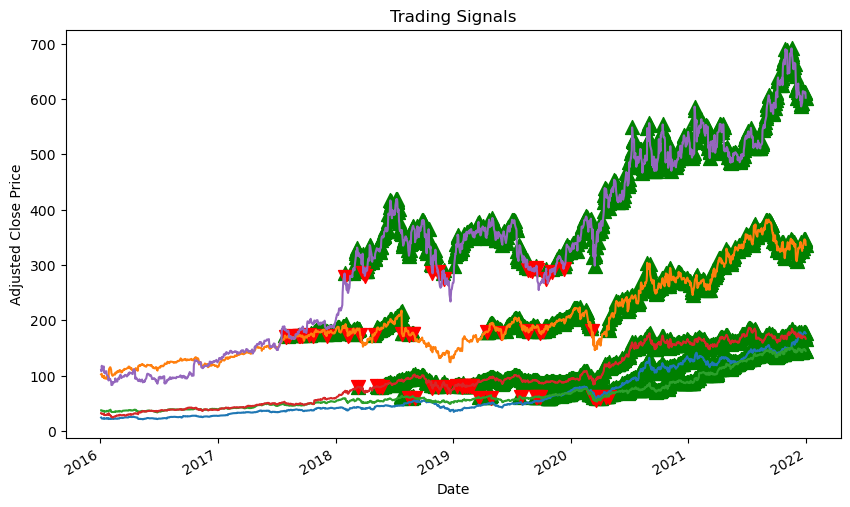

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# plot the stock price for each stock
for stock in stocks:
    data[stock].plot(ax=ax)

# plot the buy signals
for stock in stocks:
    buy_signals = [i for i, pos in enumerate(positions[stock]) if pos == 1]
    ax.scatter(data.iloc[buy_signals].index, data.iloc[buy_signals][stock], marker='^', color='green', s=100)

# plot the sell signals
for stock in stocks:
    sell_signals = [i for i, pos in enumerate(positions[stock]) if pos == 0 and i > 0 and positions[stock][i-1] == 1]
    ax.scatter(data.iloc[sell_signals].index, data.iloc[sell_signals][stock], marker='v', color='red', s=100)

# set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('Trading Signals')

plt.show()


In [11]:
len(data)

1511

In [12]:
Dataframeposition = pd.DataFrame(positions, index = data.index)
Dataframeposition

,AAPL,META,GOOG,AMZN,NFLX
Date,,,,,
2016-01-04,0,0,0,0,0
2016-01-05,0,0,0,0,0
2016-01-06,0,0,0,0,0
2016-01-07,0,0,0,0,0
2016-01-08,0,0,0,0,0
...,...,...,...,...,...
2021-12-27,1,1,1,1,1
2021-12-28,1,1,1,1,1
2021-12-29,1,1,1,1,1


In [13]:
data

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2016-01-04,24.074738,31.849501,37.091999,102.220001,109.959999
2016-01-05,23.471445,31.689501,37.129002,102.730003,107.660004
2016-01-06,23.012112,31.632500,37.181000,102.970001,117.680000
2016-01-07,22.040895,30.396999,36.319500,97.919998,114.559998
2016-01-08,22.157440,30.352501,35.723499,97.330002,111.389999
...,...,...,...,...,...
2021-12-27,179.016129,169.669495,148.063995,346.179993,613.119995
2021-12-28,177.983673,170.660995,146.447998,346.220001,610.710022
2021-12-29,178.073029,169.201004,146.504501,342.940002,610.539978


In [14]:
#merge datastock position 
#merged_table = pd.merge(Dataframeposition["AAPL"], data["AAPL"], on = data.index)
#pd.DataFrame(merged_table[merged_table["AAPL_x"]==0][0:])

In [15]:
# set initial capital
capital = 10000

# create a dataframe to store the daily returns and positions
df_returns = pd.DataFrame(index=data.index, columns=stocks)
df_positions = pd.DataFrame(index=data.index, columns=stocks)
capital_dataset=[]
portfolio_return_dataset = []
# iterate over each trading day
for i in range(1, len(data)):
    # calculate the returns for each stock
    for stock in stocks:
        df_returns.loc[data.index[i], stock] = (data[stock].iloc[i] - data[stock].iloc[i-1]) / data[stock].iloc[i-1]    
    # calculate the portfolio returns based on the positions
    checking_dataset = [df_returns.loc[data.index[i], stock] * positions[stock][i] for stock in stocks]
    portfolio_return = sum([df_returns.loc[data.index[i], stock] * positions[stock][i] for stock in stocks])
    # update the capital based on the portfolio returns
    capital += capital * portfolio_return
    capital_dataset.append(capital)
    portfolio_return_dataset.append(portfolio_return)
    # store the positions in the dataframe
    for stock in stocks:
        df_positions.loc[data.index[i], stock] = positions[stock][i]

In [16]:
df_positions

,AAPL,META,GOOG,AMZN,NFLX
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0,0,0,0,0
2016-01-06,0,0,0,0,0
2016-01-07,0,0,0,0,0
2016-01-08,0,0,0,0,0
...,...,...,...,...,...
2021-12-27,1,1,1,1,1
2021-12-28,1,1,1,1,1
2021-12-29,1,1,1,1,1


In [17]:
df_returns

,AAPL,META,GOOG,AMZN,NFLX
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,0.004989,0.000998,-0.005024,-0.020917
2016-01-06,-0.01957,0.002336,0.0014,-0.001799,0.093071
2016-01-07,-0.042205,-0.049043,-0.02317,-0.039058,-0.026513
2016-01-08,0.005288,-0.006025,-0.01641,-0.001464,-0.027671
...,...,...,...,...,...
2021-12-27,0.022975,0.032633,0.006263,-0.008178,-0.00158
2021-12-28,-0.005767,0.000116,-0.010914,0.005844,-0.003931
2021-12-29,0.000502,-0.009474,0.000386,-0.008555,-0.000278


In [18]:
#index for capital and return that we will be using
data.index[1:]

DatetimeIndex(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-19',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)

In [19]:
checking_dataset

[-0.0035352793902337413,
 -0.02326048202107269,
 -0.009061475144276694,
 -0.011429400216389623,
 -0.015765694572150143]

In [20]:
dataframe_cap = pd.DataFrame(data = capital_dataset, index = data.index[1:])
dataframe_port = pd.DataFrame(data = portfolio_return_dataset, index = data.index[1:])
dataframe_cap_port=pd.concat([dataframe_cap, dataframe_port], axis =1)
dataframe_cap_port.to_excel("KERNEL REGRESSIONE EXCEL RESULT.xlsx")
dataframe_cap_port

,0,0
Date,,
2016-01-05,1.000000e+04,0.000000
2016-01-06,1.000000e+04,0.000000
2016-01-07,1.000000e+04,0.000000
2016-01-08,1.000000e+04,0.000000
2016-01-11,1.000000e+04,0.000000
...,...,...
2021-12-27,1.040192e+06,0.052113
2021-12-28,1.024950e+06,-0.014653
2021-12-29,1.007096e+06,-0.017419


In [21]:
# df_returns.loc[[data.index[2], data.index[3]], ["AAPL","META"]]

### Step 6: Plotting Returns

#### Calculating stock daily individual returns and cumulative returns without any trading strategy

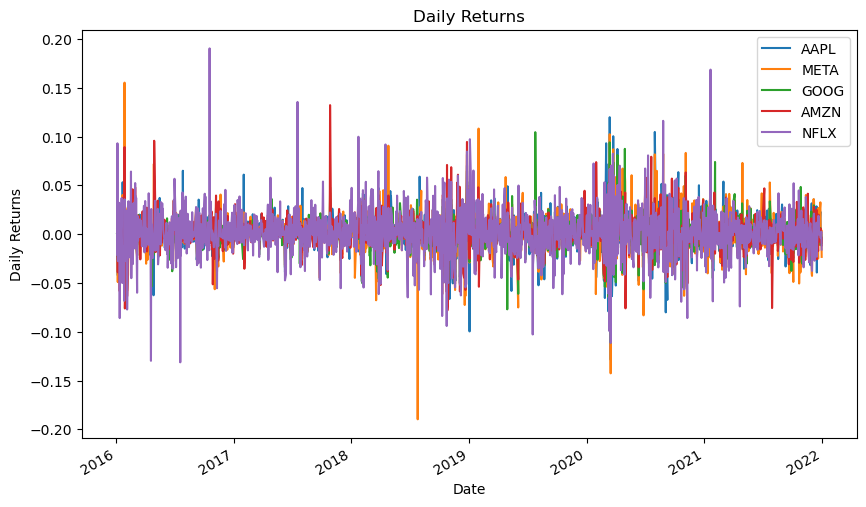

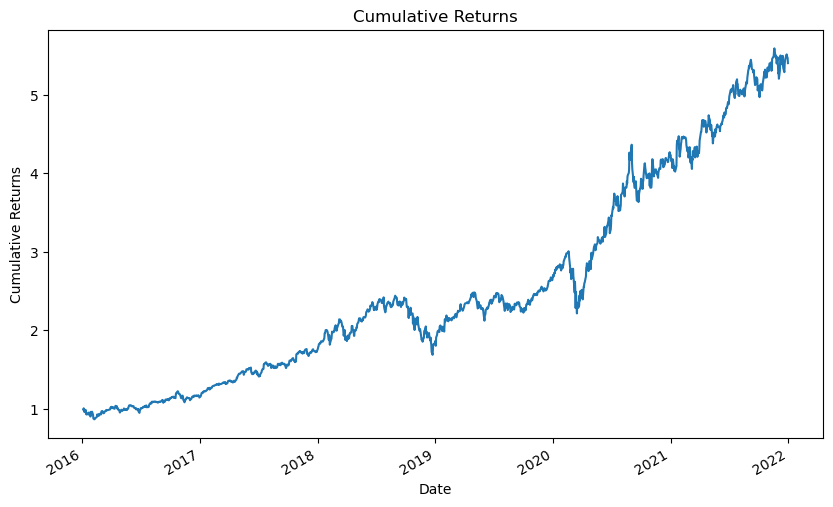

In [22]:
# calculate the daily portfolio returns and cumulative returns 
df_returns['Portfolio'] = df_returns[stocks].mean(axis=1)
df_returns['Portfolio_cumulative'] = (1 + df_returns['Portfolio']).cumprod()

# plot the daily returns
fig, ax = plt.subplots(figsize=(10,6))
df_returns[stocks].plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.set_title('Daily Returns')
plt.show()

# plot the cumulative returns
fig, ax = plt.subplots(figsize=(10,6))
df_returns['Portfolio_cumulative'].plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns')
plt.show()


In [26]:
df_returns

,AAPL,META,GOOG,AMZN,NFLX,Portfolio,Portfolio_cumulative
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.03,0.00,0.00,-0.01,-0.02,-0.01,0.99
2016-01-06,-0.02,0.00,0.00,-0.00,0.09,0.02,1.01
2016-01-07,-0.04,-0.05,-0.02,-0.04,-0.03,-0.04,0.97
2016-01-08,0.01,-0.01,-0.02,-0.00,-0.03,-0.01,0.96
...,...,...,...,...,...,...,...
2021-12-27,0.02,0.03,0.01,-0.01,-0.00,0.01,5.52
2021-12-28,-0.01,0.00,-0.01,0.01,-0.00,-0.00,5.50
2021-12-29,0.00,-0.01,0.00,-0.01,-0.00,-0.00,5.48


#### Calculating stock daily individual returns and cumulative returns with the kernel trading strategy

In [23]:
df_results = pd.read_excel("Kernel_Return_Finals.xlsx", index_col=0)
df_results

,Capital,Returns
Date,,
2016-01-05,1.000000e+04,0.000000
2016-01-06,1.000000e+04,0.000000
2016-01-07,1.000000e+04,0.000000
2016-01-08,1.000000e+04,0.000000
2016-01-11,1.000000e+04,0.000000
...,...,...
2021-12-27,1.058372e+06,0.052113
2021-12-28,1.042864e+06,-0.014653
2021-12-29,1.024698e+06,-0.017419


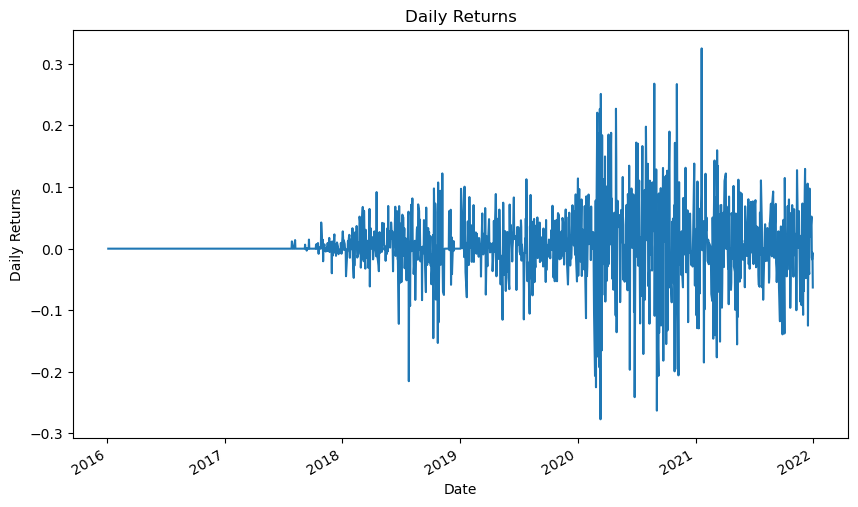

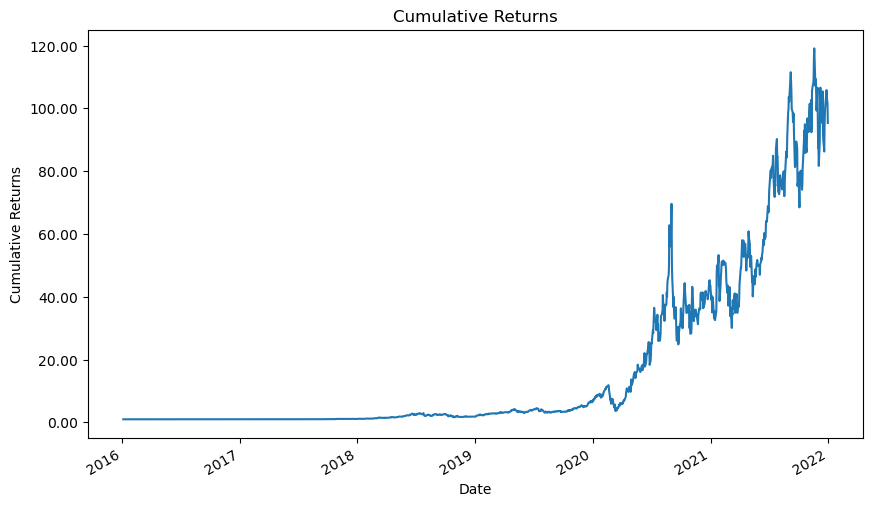

In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.ticker as ticker
# plot the daily returns
fig, ax = plt.subplots(figsize=(10,6))
df_results["Returns"].plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.set_title('Daily Returns')
plt.show()

# plot the capital/cumulative returns
fig, ax = plt.subplots(figsize=(10,6))
((df_results["Capital"])/10000).plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()


In [25]:
df_results["Capital"].tail()

Date
2021-12-27   1058371.98
2021-12-28   1042863.89
2021-12-29   1024698.00
2021-12-30   1017920.34
2021-12-31    953737.92
Name: Capital, dtype: float64